In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

CONTRAST_STRETCH_PATH = '../images/e4/contrast_stretch.tif'
BRIGHTNESS_PATH = '../images/e4/dogs.jpg'
THRESHOLD_PATH = '../images/e4/threshold.tif'
GLS_PATH = '../images/e4/GLS.tif'

def readImage(imagePath):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('original gray image')
    
    return grayscale


def negateImage(grayImage):
    # negate grayscale image
    grayscale_neg = 255 - grayImage
    plt.imshow(grayscale_neg, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Negative Image')
    
    
    
#linear piecewise contrast stretching

def contrastStretch(grayImage):
    
    def get_pw_function(points):
        #points = np.array([[0, 0], [50, 40], [100, 150], [255, 255]])
        points = np.sort(points, axis=0)

        slopes = []
        # find slopes
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i+1]

            m = ( p2[1] - p1[1] ) / ( p2[0] - p1[0] )
            slopes.append(m)

        # find the region where ip lies and its eqivalent slope
        points_r = points[:, 0]

        # the function that maps input gray level to output gray level
        def pw_function(RN):
            slope_index = 0
            for i in range(len(points_r) - 1):
                r1 = points_r[i]
                r2 = points_r[i+1]

                if RN > r1 and RN <= r2:
                    slope_index = i


            SN = (RN - points[slope_index][0])*slopes[slope_index] + points[slope_index][1]
            return SN

        # ** return the function
        return pw_function
    
    # find min and max gray levels 
    min_val = grayImage[0, 0]
    max_val = grayImage[0, 0]

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            if grayImage[i, j] < min_val:
                min_val = grayImage[i, j]
            if grayImage[i, j] > max_val:
                max_val = grayImage[i, j]
    
    points = np.array([[0, 0], [min_val, 0], [max_val, 255], [255, 255]]) 
    contrastStretchFunc = get_pw_function(points)
    
    
    # apply the contrast stretch function to each pixel

    pw_temp = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            pw_temp[i, j] = contrastStretchFunc(grayImage[i, j])
            
    plt.imshow(pw_temp, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Contrast Stretched Image')

    
    
def increaseBrightness(grayImage, value):
    
    temp = np.zeros(grayImage.shape) 
    
    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            new_val = grayImage[i, j] + value
            temp[i, j] = new_val
            if new_val > 255:
                temp[i, j] = 255
       
                
    plt.imshow(temp, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Gray image brightened by ' + str(value) + ' units')
    

    
def threshold(grayImage, value):
    temp = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            if grayImage[i, j] >= value:
                temp[i, j] = 255
            
    plt.imshow(temp, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Thresholded Image with T = ' + str(value))        
    

def thresholdAboutAvg(grayImage):
    # find avg
    sum_ = 0
    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            sum_ = sum_ + grayImage[i, j]
            
    avg = round( sum_ / (grayImage.shape[0] * grayImage.shape[1]) )
    
    avgThresholdedImage = threshold(grayImage, avg)
    

#gray level slicing without background
def GLS_without_bg(grayImage, r1, r2):

    GLS_without_bg = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            t = grayImage[i, j]
            if t >= r1 and t <=r2:
                GLS_without_bg[i, j] = 255

    plt.imshow(GLS_without_bg, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('GLS without background: r1 = ' + str(r1) + ', r2 = ' + str(r2))
    

#gray level slicing with background
def GLS_with_bg(grayImage, r1, r2):

    GLS_with_bg = np.zeros(grayImage.shape)

    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            t = grayImage[i, j]
            if t >= r1 and t <=r2:
                GLS_with_bg[i, j] = 255
            else:
                GLS_with_bg[i, j] = t

    plt.imshow(GLS_with_bg, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('GLS with background: r1 = ' + str(r1) + ', r2 = ' + str(r2))

    

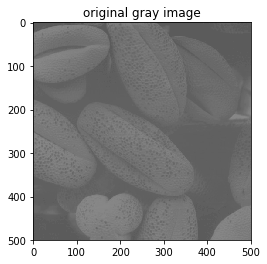

In [2]:
img1 = readImage(CONTRAST_STRETCH_PATH)

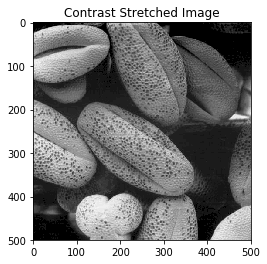

In [3]:
contrastStretch(img1)

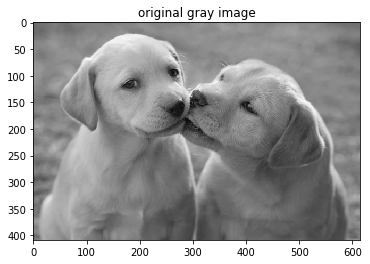

In [4]:
img2 = readImage(BRIGHTNESS_PATH)

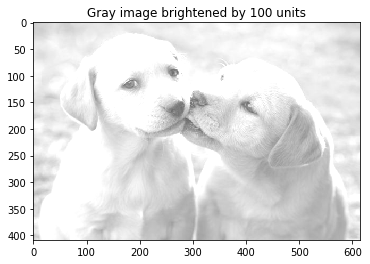

In [7]:
increaseBrightness(img2,100)

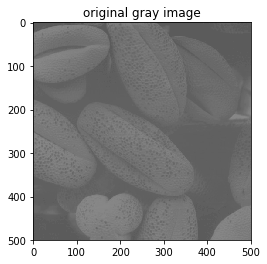

In [10]:
img3 = readImage(THRESHOLD_PATH)

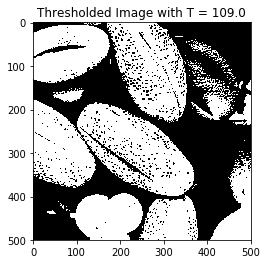

In [11]:
thresholdAboutAvg(img3)

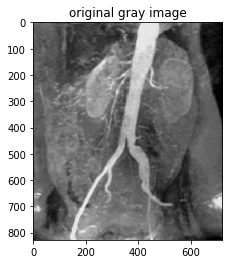

In [12]:
img4 = readImage(GLS_PATH)

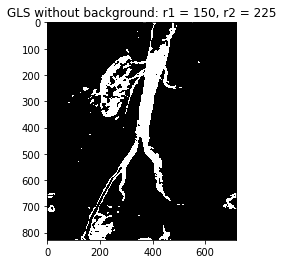

In [14]:
GLS_without_bg(img4, 150, 225)

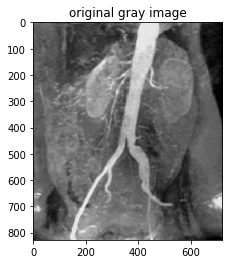

In [15]:
img5 = readImage(GLS_PATH)

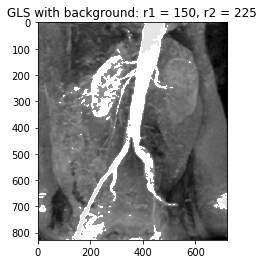

In [16]:
GLS_with_bg(img5, 150, 225)